In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# 0. Data Preprocessing + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the value
# 3. Train test split
# 4. Train the model
# 5. Evalute the model/ model Selection
# 6. Deployment

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df = df.iloc[:,1:]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [13]:
import seaborn as sns

<Axes: xlabel='cgpa', ylabel='iq'>

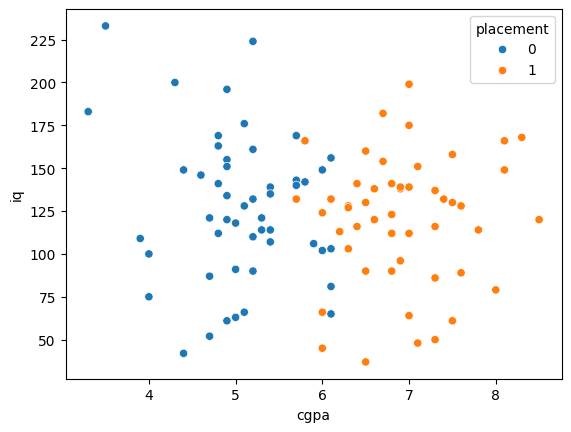

In [15]:
sns.scatterplot(x='cgpa',y='iq',hue='placement',data=df)

In [16]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
# x
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [20]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [22]:
X_test

,cgpa,iq
35,6.8,90.0
68,4.0,75.0
50,3.5,233.0
74,6.7,154.0
29,7.0,112.0
12,5.4,139.0
56,6.1,65.0
20,6.6,120.0
90,7.3,86.0
43,6.8,141.0


In [23]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [24]:
X_train

array([[-1.85474189, -0.38096257],
       [-0.25565628,  0.21062972],
       [ 0.01085799, -1.48698292],
       [-0.96636099,  1.85679955],
       [ 0.09969608,  0.21062972],
       [-0.69984673,  0.21062972],
       [-0.8775229 , -0.14946993],
       [ 0.63272461,  1.4966999 ],
       [-0.96636099,  0.802222  ],
       [-0.69984673, -0.86966924],
       [ 2.23181022, -0.09802713],
       [ 0.45504844, -2.23290363],
       [ 0.09969608, -1.10116187],
       [ 0.27737226,  0.1077441 ],
       [-0.78868481, -1.48698292],
       [ 0.45504844,  0.15918691],
       [-0.16681819,  0.46784375],
       [ 0.27737226, -0.53529099],
       [ 0.45504844,  0.93082902],
       [-0.96636099, -0.09802713],
       [ 0.98807697, -1.94996819],
       [-1.05519908, -0.30379836],
       [ 0.09969608, -0.53529099],
       [-0.16681819,  1.08515744],
       [ 1.43226742, -0.89539064],
       [ 1.78761977, -1.15260468],
       [ 1.34342933,  0.87938621],
       [ 0.89923888, -1.53842573],
       [-2.38777042,

In [25]:
X_test = scaler.transform(X_test)

In [26]:
X_test

array([[ 0.7215627 , -0.86966924],
       [-1.7659038 , -1.25549029],
       [-2.21009424,  2.80849149],
       [ 0.63272461,  0.7765006 ],
       [ 0.89923888, -0.30379836],
       [-0.52217055,  0.39067954],
       [ 0.09969608, -1.51270433],
       [ 0.54388652, -0.09802713],
       [ 1.16575315, -0.97255485],
       [ 0.7215627 ,  0.44212235]])

In [27]:
y_train

31    0
87    1
45    1
80    0
71    1
     ..
73    0
66    1
96    0
11    1
89    0
Name: placement, Length: 90, dtype: int64

In [29]:
# Training via logistic regression

from sklearn.linear_model import LogisticRegression


In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
# Evaluate The Model

y_pred = model.predict(X_test)

In [33]:
y_test

35    1
68    0
50    0
74    1
29    1
12    0
56    0
20    1
90    1
43    1
Name: placement, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

90.0

In [37]:
# Plotting Decision Boundary

from mlxtend.plotting import plot_decision_regions

<Axes: >

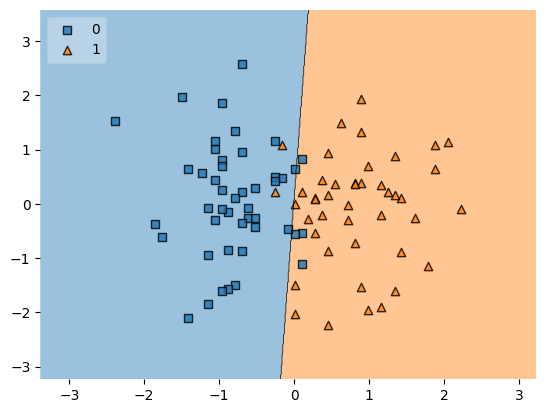

In [38]:
plot_decision_regions(X_train,y_train.values,clf=model,legend=2)

In [39]:
# Deployment

import pickle

In [40]:
pickle.dump(model,open('model.pkl','wb'))